In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import _pickle 


In [2]:
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.shape

(2938, 22)

In [5]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [6]:
def remove_whitespace(x):
    try:
        # Remove spaces inside of the string
        x = "".join(x.split())

    except:
        pass
    return x

In [7]:
df.Country = df.Country.apply(remove_whitespace)


In [8]:
distinct_countries = df['Country'].unique()
distinct_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'AntiguaandBarbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia(PlurinationalStateof)', 'BosniaandHerzegovina',
       'Botswana', 'Brazil', 'BruneiDarussalam', 'Bulgaria',
       'BurkinaFaso', 'Burundi', "Côted'Ivoire", 'CaboVerde', 'Cambodia',
       'Cameroon', 'Canada', 'CentralAfricanRepublic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'CookIslands',
       'CostaRica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "DemocraticPeople'sRepublicofKorea",
       'DemocraticRepublicoftheCongo', 'Denmark', 'Djibouti', 'Dominica',
       'DominicanRepublic', 'Ecuador', 'Egypt', 'ElSalvador',
       'EquatorialGuinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Gren

In [9]:
# Categorical Variable 2 :: Status
distinct_status = df['Status'].unique()
distinct_status

array(['Developing', 'Developed'], dtype=object)

In [10]:
#Changing column names
#------------------------
orig_cols = list(df.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').replace('-', '_').lower())
    
df.columns = new_cols
df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)
df.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [11]:
df.adult_mortality = df.apply(lambda x: np.nan if (x.adult_mortality < 35 or x.adult_mortality > 600) else x.adult_mortality, axis=1)
df.infant_deaths = df.apply(lambda x: np.nan if (x.infant_deaths < 2 or x.infant_deaths > 900) else x.infant_deaths, axis=1)
df.under_five_deaths = df.apply(lambda x: np.nan if (x.under_five_deaths < 3 or x.under_five_deaths > 800) else x.under_five_deaths, axis=1)

<AxesSubplot:>

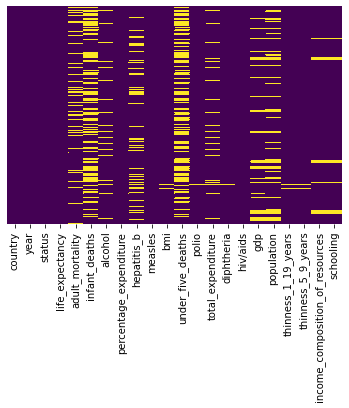

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
df.isnull().sum()

country                               0
year                                  0
status                                0
life_expectancy                      10
adult_mortality                     468
infant_deaths                      1206
alcohol                             194
percentage_expenditure                0
hepatitis_b                         553
measles                               0
bmi                                  34
under_five_deaths                  1337
polio                                19
total_expenditure                   226
diphtheria                           19
hiv/aids                              0
gdp                                 448
population                          652
thinness_1_19_years                  34
thinness_5_9_years                   34
income_composition_of_resources     167
schooling                           163
dtype: int64

In [14]:
df.fillna(df.mean(), inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   float64
 6   alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2938 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2938 non-null   float64
 11  under_five_deaths                2938 non-null   float64
 12  polio               

In [16]:
# Features not required will be stored in this list
feature_not_required = []

<AxesSubplot:xlabel='life_expectancy', ylabel='Density'>

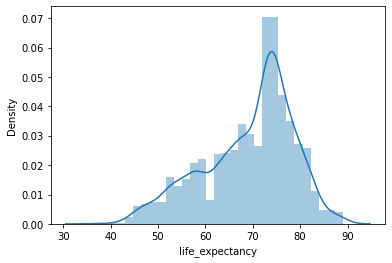

In [17]:
sns.distplot(df['life_expectancy'])

<AxesSubplot:xlabel='alcohol', ylabel='life_expectancy'>

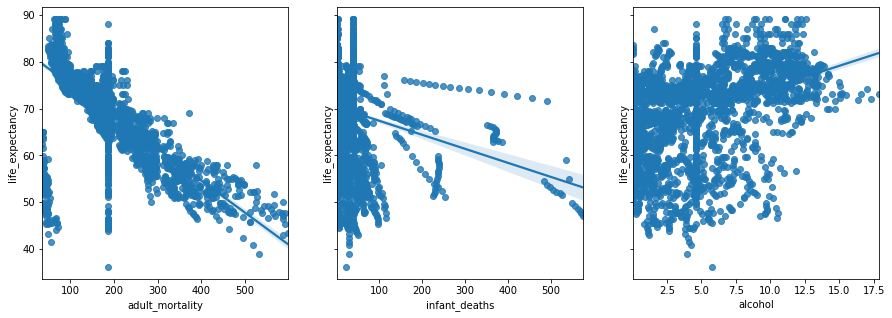

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=df['adult_mortality'], y=df['life_expectancy'], ax=ax1)
sns.regplot(x=df['infant_deaths'], y=df['life_expectancy'], ax=ax2)
sns.regplot(x=df['alcohol'], y=df['life_expectancy'], ax=ax3)

Adult Mortality is showing a negative linear relationship

Infant death is showing no significant linear relationship, thus not required

Infant death is showing no significant linear relationship, thus not required

In [19]:
feature_not_required.append('infant_deaths')
feature_not_required.append('alcohol')

<AxesSubplot:xlabel='measles', ylabel='life_expectancy'>

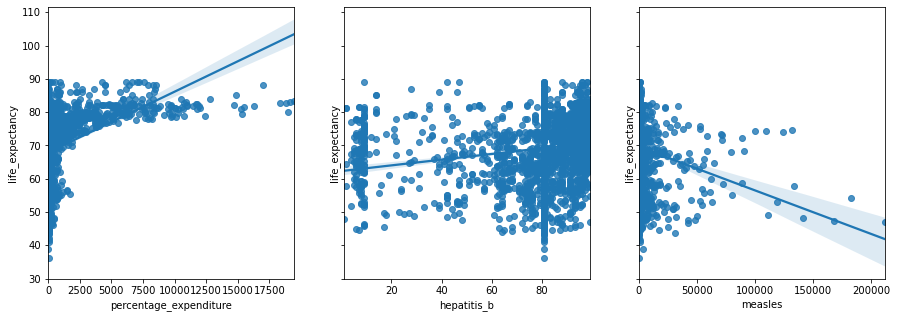

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=df['percentage_expenditure'], y=df['life_expectancy'], ax=ax1)
sns.regplot(x=df['hepatitis_b'], y=df['life_expectancy'], ax=ax2)
sns.regplot(x=df['measles'], y=df['life_expectancy'], ax=ax3)

Pcnt_expenditure is showing no significant linear relationship, thus not required


Hepatitis_b is showing no significant linear relationship, thus not required


Measles is showing little significant linear relationship, thus required

In [21]:
feature_not_required.append('percentage_expenditure')
feature_not_required.append('hepatitis_b')

<AxesSubplot:xlabel='diphtheria', ylabel='life_expectancy'>

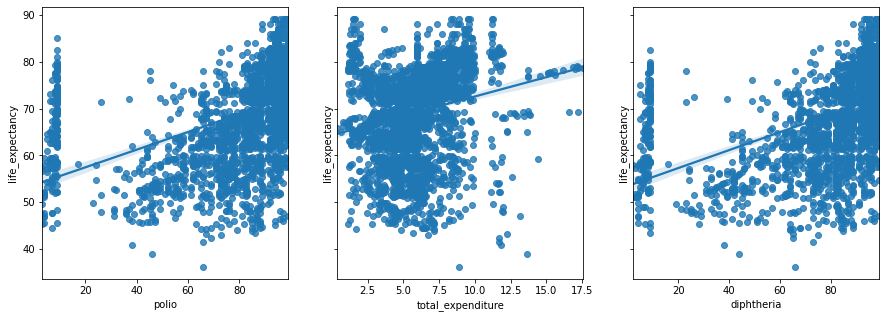

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=df['polio'], y=df['life_expectancy'], ax=ax1)
sns.regplot(x=df['total_expenditure'], y=df['life_expectancy'], ax=ax2)
sns.regplot(x=df['diphtheria'], y=df['life_expectancy'], ax=ax3)

Polio is showing no significant linear relationship, thus not required

Total_expenditure is showing no significant linear relationship, thus not required

Diphtheria is showing no significant linear relationship, thus not required

In [23]:
feature_not_required.append('polio')
feature_not_required.append('total_expenditure')
feature_not_required.append('diphtheria')

<AxesSubplot:xlabel='population', ylabel='life_expectancy'>

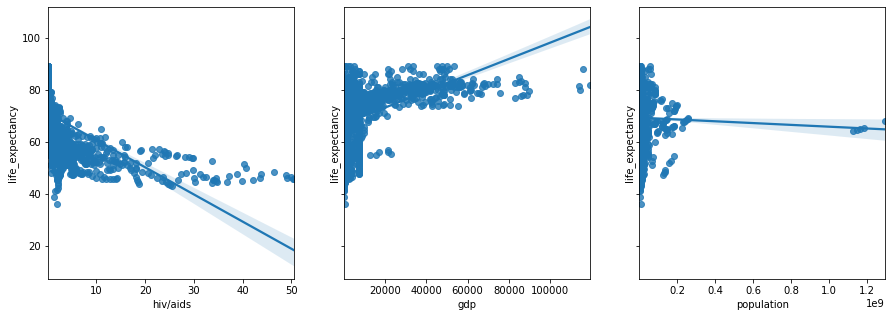

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=df['hiv/aids'], y=df['life_expectancy'], ax=ax1)
sns.regplot(x=df['gdp'], y=df['life_expectancy'], ax=ax2)
sns.regplot(x=df['population'], y=df['life_expectancy'], ax=ax3)

HIV/aids is showing significant linear relationship, thus required

GDP is showing no significant linear relationship, thus not required

Population is showing no significant linear relationship, thus not required

In [25]:
feature_not_required.append('gdp')
feature_not_required.append('population')

<AxesSubplot:xlabel='income_composition_of_resources', ylabel='life_expectancy'>

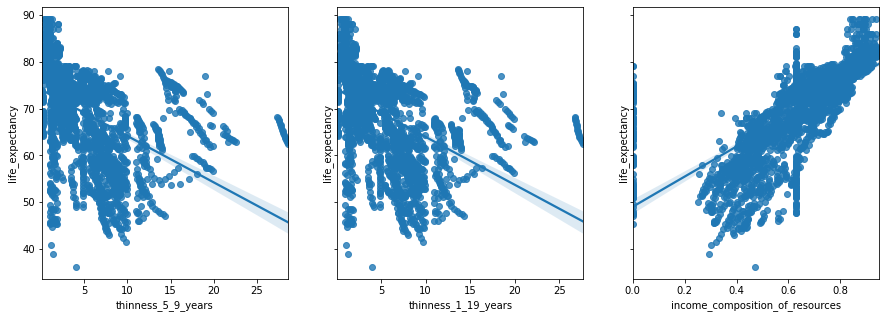

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=df['thinness_1_19_years'], y=df['life_expectancy'], ax=ax2)
sns.regplot(x=df['thinness_5_9_years'], y=df['life_expectancy'], ax=ax1)
sns.regplot(x=df['income_composition_of_resources'], y=df['life_expectancy'], ax=ax3)

Income_composition is showing significant linear relationship, thus required

thinness_1-19 is showing no significant linear relationship, thus not required

thinness_5-9 is showing no significant linear relationship, thus not required

In [27]:
feature_not_required.append('thinness_1_19_years')
feature_not_required.append('thinness_5_9_years')

<AxesSubplot:xlabel='bmi', ylabel='life_expectancy'>

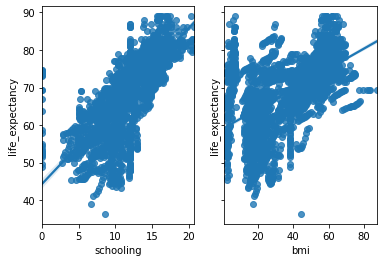

In [28]:
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x=df['schooling'], y=df['life_expectancy'], ax=ax1)
sns.regplot(x=df['bmi'], y=df['life_expectancy'], ax=ax2)

Schooling is showing significant linear relationship, thus required

BMI-19 is showing no significant linear relationship, thus not required

In [29]:
feature_not_required.append('bmi')

In [30]:
df.drop(feature_not_required,inplace=True,axis=1)

In [31]:
df.head()

,country,year,status,life_expectancy,adult_mortality,measles,under_five_deaths,hiv/aids,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,1154,83.0,0.1,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,492,86.0,0.1,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,430,89.0,0.1,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,2787,93.0,0.1,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,3013,97.0,0.1,0.454,9.5


In [32]:
df.country.nunique()

193

In [33]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'AntiguaandBarbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia(PlurinationalStateof)', 'BosniaandHerzegovina',
       'Botswana', 'Brazil', 'BruneiDarussalam', 'Bulgaria',
       'BurkinaFaso', 'Burundi', "Côted'Ivoire", 'CaboVerde', 'Cambodia',
       'Cameroon', 'Canada', 'CentralAfricanRepublic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'CookIslands',
       'CostaRica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "DemocraticPeople'sRepublicofKorea",
       'DemocraticRepublicoftheCongo', 'Denmark', 'Djibouti', 'Dominica',
       'DominicanRepublic', 'Ecuador', 'Egypt', 'ElSalvador',
       'EquatorialGuinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Gren

In [34]:
C = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'AntiguaandBarbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia(PlurinationalStateof)', 'BosniaandHerzegovina',
       'Botswana', 'Brazil', 'BruneiDarussalam', 'Bulgaria',
       'BurkinaFaso', 'Burundi', "Côted'Ivoire", 'CaboVerde', 'Cambodia',
       'Cameroon', 'Canada', 'CentralAfricanRepublic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'CookIslands',
       'CostaRica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "DemocraticPeople'sRepublicofKorea",
       'DemocraticRepublicoftheCongo', 'Denmark', 'Djibouti', 'Dominica',
       'DominicanRepublic', 'Ecuador', 'Egypt', 'ElSalvador',
       'EquatorialGuinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran(IslamicRepublicof)', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
       "LaoPeople'sDemocraticRepublic", 'Latvia', 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar',
       'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'MarshallIslands', 'Mauritania', 'Mauritius', 'Mexico',
       'Micronesia(FederatedStatesof)', 'Monaco', 'Mongolia',
       'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia',
       'Nauru', 'Nepal', 'Netherlands', 'NewZealand', 'Nicaragua',
       'Niger', 'Nigeria', 'Niue', 'Norway', 'Oman', 'Pakistan', 'Palau',
       'Panama', 'PapuaNewGuinea', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Qatar', 'RepublicofKorea',
       'RepublicofMoldova', 'Romania', 'RussianFederation', 'Rwanda',
       'SaintKittsandNevis', 'SaintLucia', 'SaintVincentandtheGrenadines',
       'Samoa', 'SanMarino', 'SaoTomeandPrincipe', 'SaudiArabia',
       'Senegal', 'Serbia', 'Seychelles', 'SierraLeone', 'Singapore',
       'Slovakia', 'Slovenia', 'SolomonIslands', 'Somalia', 'SouthAfrica',
       'SouthSudan', 'Spain', 'SriLanka', 'Sudan', 'Suriname',
       'Swaziland', 'Sweden', 'Switzerland', 'SyrianArabRepublic',
       'Tajikistan', 'Thailand', 'TheformerYugoslavrepublicofMacedonia',
       'Timor-Leste', 'Togo', 'Tonga', 'TrinidadandTobago', 'Tunisia',
       'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine',
       'UnitedArabEmirates',
       'UnitedKingdomofGreatBritainandNorthernIreland',
       'UnitedRepublicofTanzania', 'UnitedStatesofAmerica', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela(BolivarianRepublicof)',
       'VietNam', 'Yemen', 'Zambia', 'Zimbabwe']

In [35]:
df.replace(to_replace =C, value =[i for i in range(0,193)], inplace=True)
    
    

In [36]:
df.head()

,country,year,status,life_expectancy,adult_mortality,measles,under_five_deaths,hiv/aids,income_composition_of_resources,schooling
0,0,2015,Developing,65.0,263.0,1154,83.0,0.1,0.479,10.1
1,0,2014,Developing,59.9,271.0,492,86.0,0.1,0.476,10.0
2,0,2013,Developing,59.9,268.0,430,89.0,0.1,0.470,9.9
3,0,2012,Developing,59.5,272.0,2787,93.0,0.1,0.463,9.8
4,0,2011,Developing,59.2,275.0,3013,97.0,0.1,0.454,9.5


In [37]:
df.status.unique()

array(['Developing', 'Developed'], dtype=object)

In [38]:
df = pd.concat([df, pd.get_dummies(df['status'],drop_first=True)],axis=1)
df.head()

,country,year,status,life_expectancy,adult_mortality,measles,under_five_deaths,hiv/aids,income_composition_of_resources,schooling,Developing
0,0,2015,Developing,65.0,263.0,1154,83.0,0.1,0.479,10.1,1
1,0,2014,Developing,59.9,271.0,492,86.0,0.1,0.476,10.0,1
2,0,2013,Developing,59.9,268.0,430,89.0,0.1,0.470,9.9,1
3,0,2012,Developing,59.5,272.0,2787,93.0,0.1,0.463,9.8,1
4,0,2011,Developing,59.2,275.0,3013,97.0,0.1,0.454,9.5,1


In [39]:

df.drop(['status'],inplace=True,axis=1)

In [40]:
df.head(2)

,country,year,life_expectancy,adult_mortality,measles,under_five_deaths,hiv/aids,income_composition_of_resources,schooling,Developing
0,0,2015,65.0,263.0,1154,83.0,0.1,0.479,10.1,1
1,0,2014,59.9,271.0,492,86.0,0.1,0.476,10.0,1


In [41]:
df.corr()

,country,year,life_expectancy,adult_mortality,measles,under_five_deaths,hiv/aids,income_composition_of_resources,schooling,Developing
country,1.000000,0.001350,-0.013475,0.021393,-0.024164,-0.078430,0.089229,-0.023711,-0.025427,-0.032439
year,0.001350,1.000000,0.169623,-0.074560,-0.082493,-0.028811,-0.139741,0.236333,0.203471,0.001864
life_expectancy,-0.013475,0.169623,1.000000,-0.713301,-0.157574,-0.169708,-0.556457,0.692483,0.715066,-0.481962
adult_mortality,0.021393,-0.074560,-0.713301,1.000000,0.039643,0.097973,0.399371,-0.481454,-0.483833,0.352575
measles,-0.024164,-0.082493,-0.157574,0.039643,1.000000,0.348609,0.030899,-0.115764,-0.122609,0.076955
under_five_deaths,-0.078430,-0.028811,-0.169708,0.097973,0.348609,1.000000,-0.004123,-0.108004,-0.174263,0.054915
hiv/aids,0.089229,-0.139741,-0.556457,0.399371,0.030899,-0.004123,1.000000,-0.247454,-0.218620,0.148590
income_composition_of_resources,-0.023711,0.236333,0.692483,-0.481454,-0.115764,-0.108004,-0.247454,1.000000,0.796207,-0.457302
schooling,-0.025427,0.203471,0.715066,-0.483833,-0.122609,-0.174263,-0.218620,0.796207,1.000000,-0.491444
Developing,-0.032439,0.001864,-0.481962,0.352575,0.076955,0.054915,0.148590,-0.457302,-0.491444,1.000000


<AxesSubplot:>

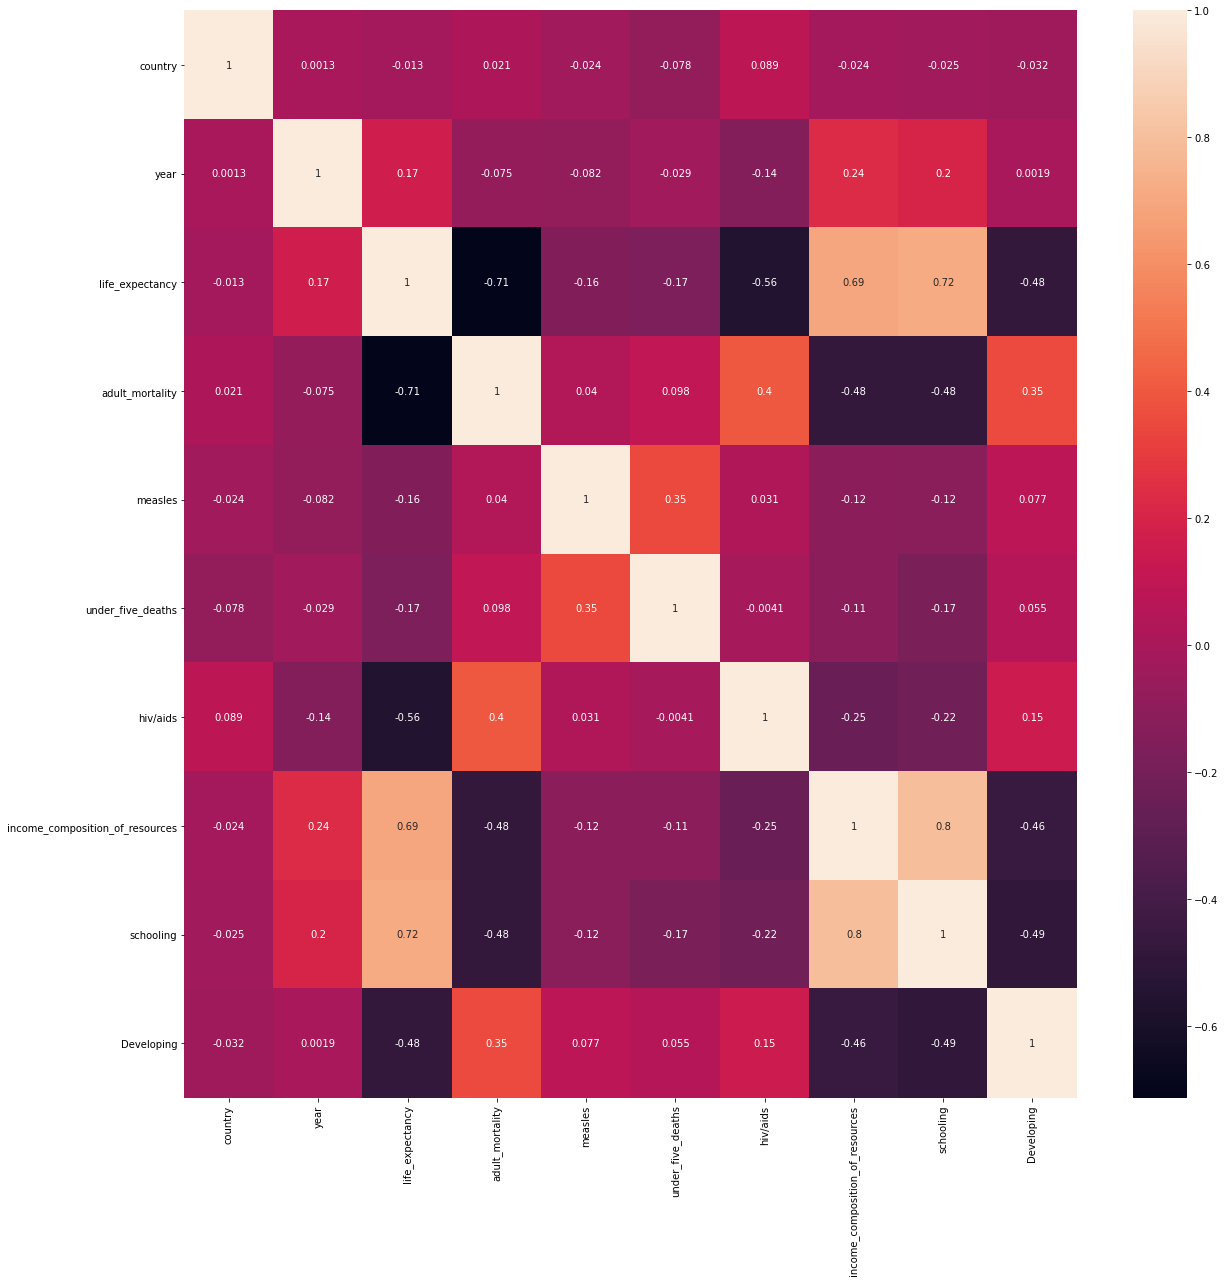

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [43]:
df.drop(['country'],inplace=True,axis=1)

In [44]:
df.head(2)

,year,life_expectancy,adult_mortality,measles,under_five_deaths,hiv/aids,income_composition_of_resources,schooling,Developing
0,2015,65.0,263.0,1154,83.0,0.1,0.479,10.1,1
1,2014,59.9,271.0,492,86.0,0.1,0.476,10.0,1


In [45]:
# Splittinng X and Y (Features and output)
#-----------------------------------
y=df['life_expectancy']
X=df.drop('life_expectancy',axis=1)
print('Shape of x =',X.shape)
print('Shape of y =',y.shape)

Shape of x = (2938, 8)
Shape of y = (2938,)


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=500) 
print('Shape of X_train =',X_train.shape)
print('Shape of y_train =',y_train.shape)
print('Shape of X_test =',X_test.shape)
print('Shape of y_test =',y_test.shape)


Shape of X_train = (2350, 8)
Shape of y_train = (2350,)
Shape of X_test = (588, 8)
Shape of y_test = (588,)


In [48]:
mmc =  MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [49]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [50]:
X_train_mmc

array([[2.00000000e-01, 2.71651212e-01, 4.71291291e-06, ...,
        4.65608466e-01, 5.09708738e-01, 1.00000000e+00],
       [6.66666667e-01, 2.29390681e-01, 2.35645646e-04, ...,
        6.33862434e-01, 6.01941748e-01, 1.00000000e+00],
       [1.33333333e-01, 6.97132616e-01, 1.31396012e-02, ...,
        5.16402116e-01, 4.61165049e-01, 1.00000000e+00],
       ...,
       [9.33333333e-01, 3.88888889e-01, 3.70434955e-03, ...,
        5.02645503e-01, 5.19417476e-01, 1.00000000e+00],
       [6.66666667e-01, 4.64157706e-01, 4.71291291e-06, ...,
        6.98412698e-01, 6.06796117e-01, 1.00000000e+00],
       [1.00000000e+00, 2.71651212e-01, 4.24162162e-05, ...,
        6.09523810e-01, 6.06796117e-01, 1.00000000e+00]])

In [51]:
X_train_mmc = pd.DataFrame(X_train_mmc,columns = ['year','adult_mortality','measles','under_five_deaths','hiv/aids','income_composition_of_resources','schooling','Developing'])
X_test_mmc = pd.DataFrame(X_test_mmc,columns = ['year','adult_mortality','measles','under_five_deaths','hiv/aids','income_composition_of_resources','schooling','Developing'])

In [52]:
X_train_mmc.head()

,year,adult_mortality,measles,under_five_deaths,hiv/aids,income_composition_of_resources,schooling,Developing
0,0.200000,0.271651,0.000005,0.005096,0.671315,0.465608,0.509709,1.0
1,0.666667,0.229391,0.000236,0.000000,0.000000,0.633862,0.601942,1.0
2,0.133333,0.697133,0.013140,0.014013,0.141434,0.516402,0.461165,1.0
3,0.266667,0.271651,0.000033,0.062417,0.000000,0.720635,0.529126,1.0
4,0.666667,0.172043,0.000344,0.001274,0.000000,0.808466,0.621359,1.0


In [53]:
X_train_mmc.describe().round(2)

,year,adult_mortality,measles,under_five_deaths,hiv/aids,income_composition_of_resources,schooling,Developing
count,2350.00,2350.00,2350.00,2350.00,2350.00,2350.00,2350.00,2350.00
mean,0.50,0.27,0.01,0.06,0.03,0.67,0.58,0.83
std,0.31,0.18,0.06,0.08,0.10,0.22,0.16,0.38
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.22,0.15,0.00,0.02,0.00,0.54,0.50,1.00
50%,0.53,0.27,0.00,0.06,0.00,0.70,0.59,1.00
75%,0.73,0.33,0.00,0.06,0.01,0.82,0.68,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


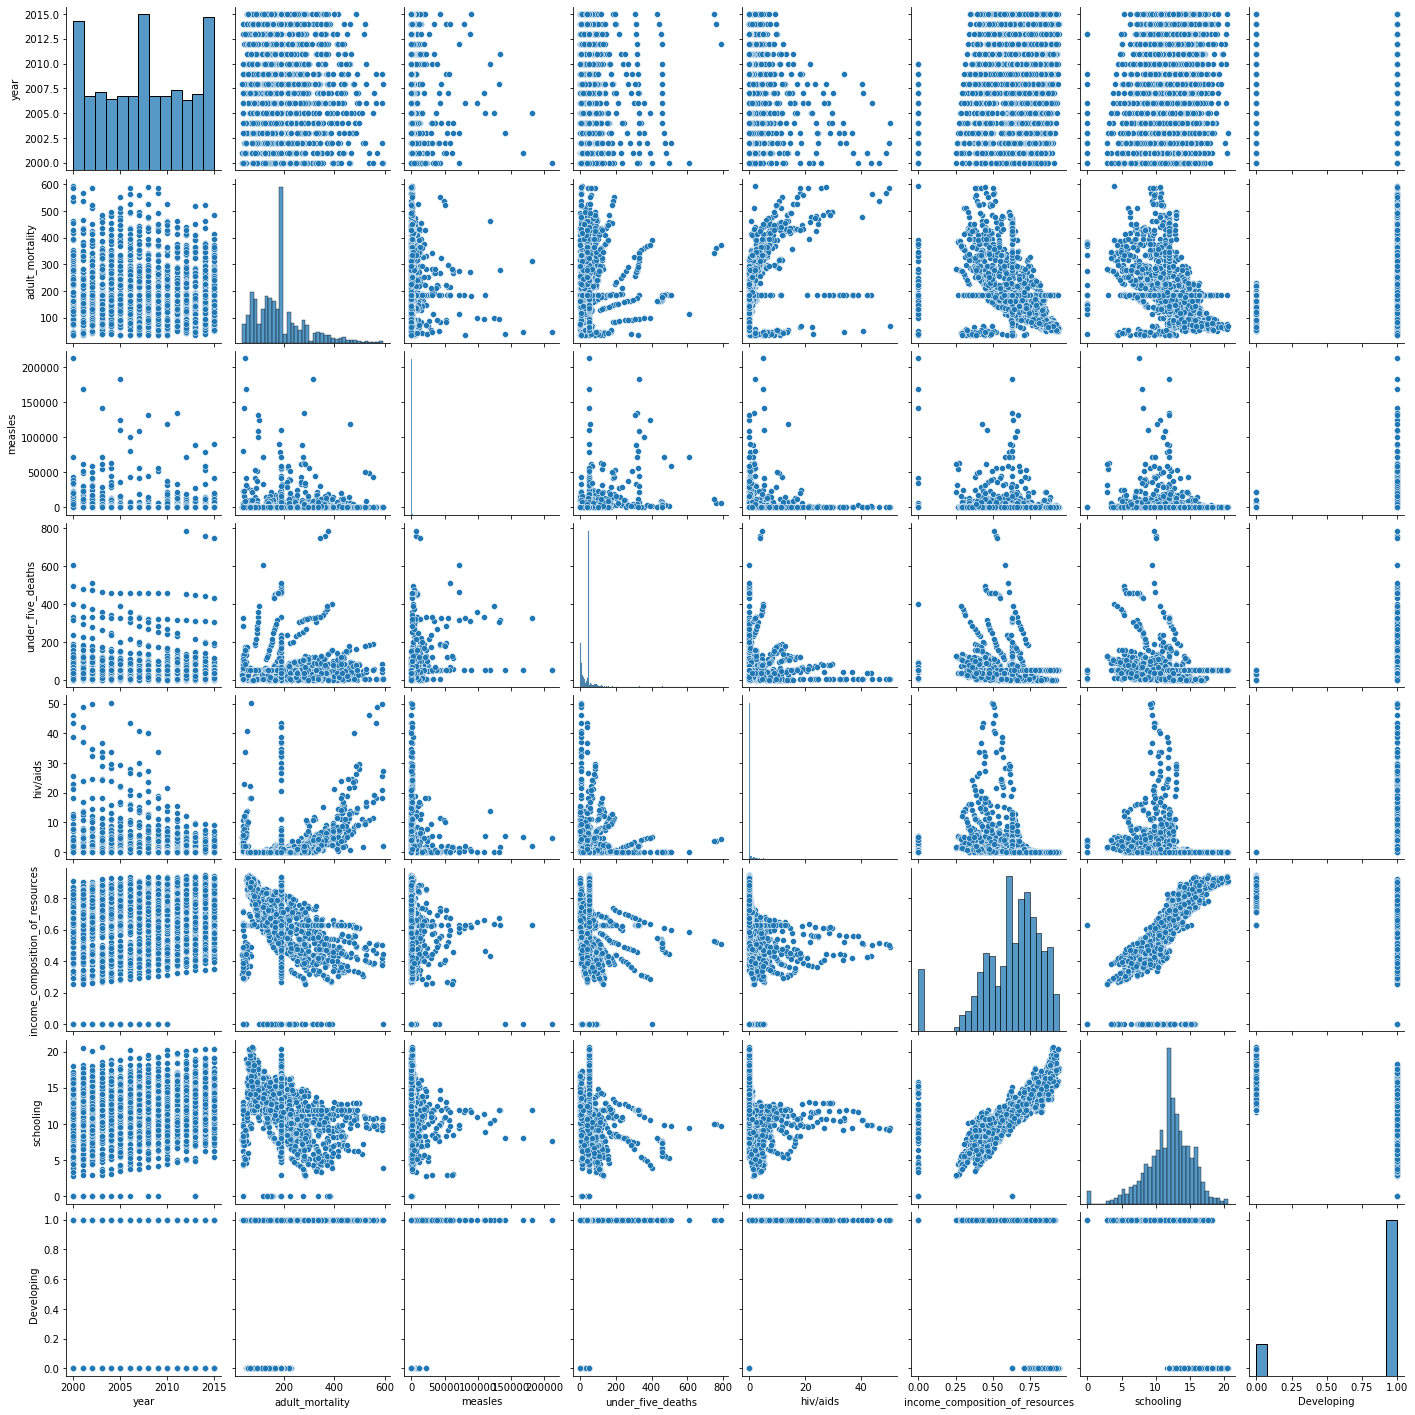

In [54]:
sns.pairplot(X_train)

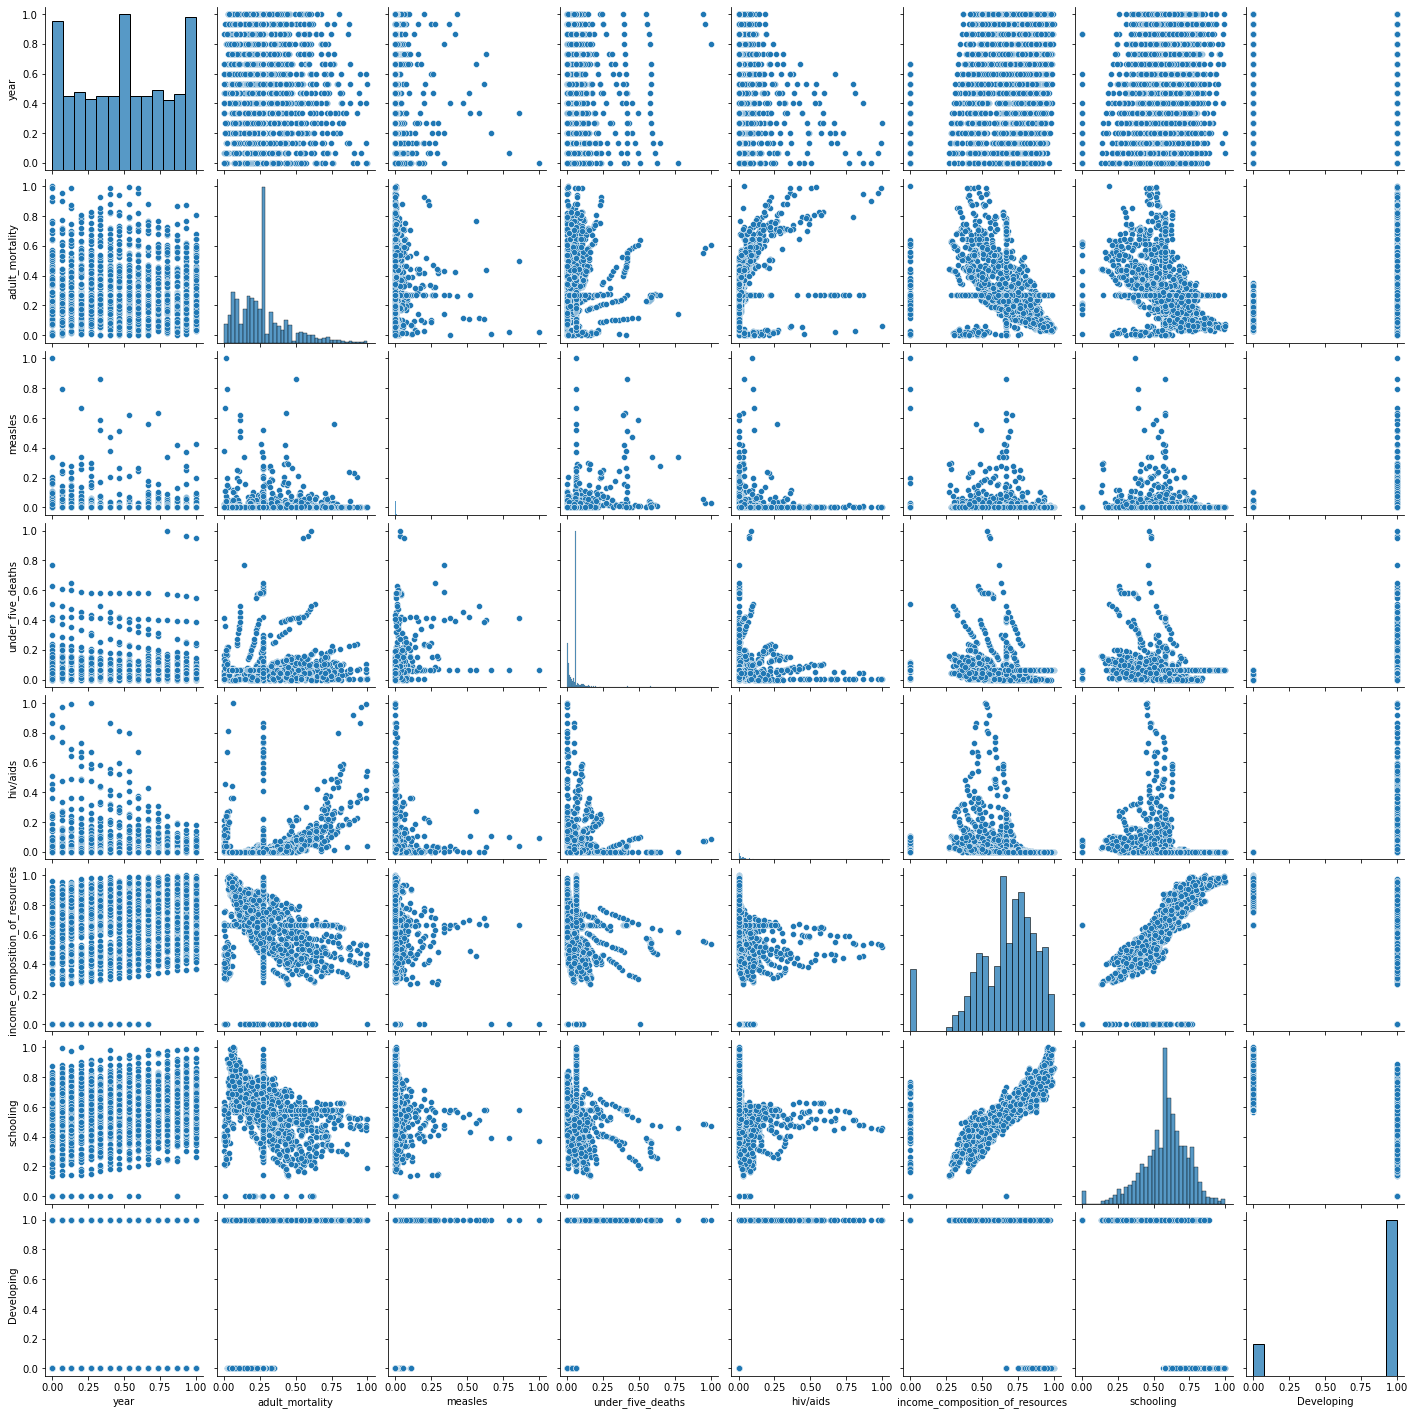

In [55]:
sns.pairplot(X_train_mmc)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [58]:
model.fit(X_train,y_train)

LinearRegression()

In [60]:
# Saving model to disk
_pickle.dump(model, open('model.pkl','wb'))

In [319]:
print(model.score(X_test, y_test ))   
y_pred = model.predict(X_test)


0.821539396905631


In [320]:
# print the intercept
print(model.coef_)

[-1.42272314e-02 -3.12169457e-02 -5.27787807e-05 -7.40366742e-03
 -5.50103320e-01  7.93292800e+00  8.53343919e-01 -2.19791622e+00]


In [321]:
predictions = model.predict(X_test)

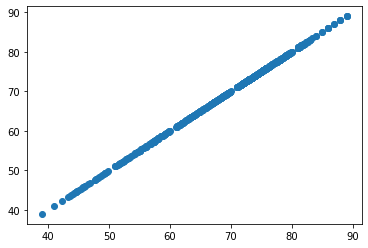

In [322]:
plt.scatter(y_test,y_test)

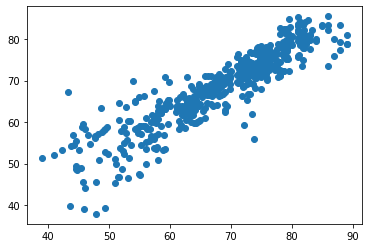

In [323]:
plt.scatter(y_test,predictions)

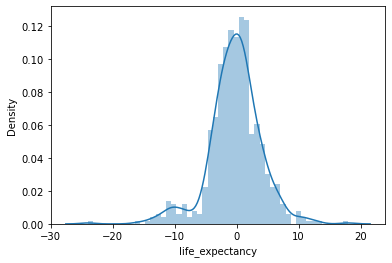

In [324]:
sns.distplot((y_test-predictions),bins=50);

In [325]:
predictions.shape

(588,)

In [326]:
from sklearn import metrics

In [327]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.0445921631352335
MSE: 18.25185429271376
RMSE: 4.272218895692701


In [328]:
metrics.mean_absolute_error

<function sklearn.metrics._regression.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

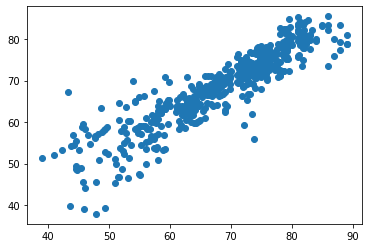

In [329]:
plt.scatter(y_test,predictions)

In [330]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [331]:
new_df=df.values.reshape(-1,1)
new_df                                    

array([[2.015e+03],
       [6.500e+01],
       [2.630e+02],
       ...,
       [4.340e-01],
       [9.800e+00],
       [1.000e+00]])

In [332]:
 len(X_train)

2056

In [333]:
len(y_train)

2056

In [334]:
len(y_test..values.reshape(-1,1))

SyntaxError: invalid syntax (<ipython-input-334-490a0f9a724c>, line 1)

In [335]:
len(X_test)

882

In [336]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [337]:
y_pred = regressor.predict(X_test)

In [338]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
2676,74.0,71.0
823,72.0,71.4
1972,75.7,75.7
2371,67.4,67.6
2728,47.7,51.0
...,...,...
2397,58.9,57.5
1257,79.8,84.0
1005,79.1,77.0
988,73.9,73.8


In [339]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [340]:
y_pred = regressor.predict(X_test)

In [341]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
2676,74.0,73.74
823,72.0,70.53
1972,75.7,75.21
2371,67.4,66.50
2728,47.7,49.55
...,...,...
2397,58.9,60.82
1257,79.8,81.62
1005,79.1,79.71
988,73.9,73.48


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 2676 to 1889
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Real Values       882 non-null    float64
 1   Predicted Values  882 non-null    float64
dtypes: float64(2)
memory usage: 20.7 KB


In [346]:
min(X)

'Developing'

In [345]:
# # Visualising the Random Forest Regression Results  
X_grid = np.arange(, max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Data')
plt.ylabel('life_expectancy')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('Data')
plt.ylabel('life_expectancy')
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [354]:
X_grid = np.arange(0, 10,3)
X_grid

array([0, 3, 6, 9])